In [15]:
import pandas as pd
import pandasql as psql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Intro


The main purpose of this project is to use SQL and python to perform EDA on the dataset. Which consist of finding trends on the products and/or category of product such as which sold more, which had a high profit etc. As well to see from which state are customers usually from.

Then by using Tableau we can create an interactive dashboard to gain more insight on the trends. We can see a more detailed year by year breakdown of profit and sales. Along with a visual on which products were a state favorite. 

The dataset was found on Kaggle, link: https://www.kaggle.com/datasets/anandshaw2001/amazon-sales-dataset?resource=download

# Loading in the Data

In the  original data, some column names have spaces and that is a problem since it will make the sql query error when trying to reference the column. Hence why I trimmed the whitespace.

In [2]:
main_df = pd.read_excel("Amazon 2_Raw.xlsx")
main_df.rename(columns= {"Order Date": "OrderDate", "Ship Date": "ShipDate", "Order ID": "OrderID", "Product Name": "ProductName"}, inplace= True)
main_df

,OrderID,OrderDate,ShipDate,EmailID,Geography,Category,ProductName,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825
...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208
3199,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
3200,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932
3201,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


# Data Cleaning

In [16]:
main_df.isna().sum()

OrderID        0
OrderDate      0
ShipDate       0
EmailID        0
Geography      0
Category       0
ProductName    0
Sales          0
Quantity       0
Profit         0
dtype: int64

There is no NULL values so no need to do anytning else in that area. 

Now we will clean the _OrderDate_ such that the year,month and day has their own column. As well with the _Geography_ column so the country state and city have their own column. This will just make working with the data easier!

In [4]:
query =  """
SELECT *, 
STRFTIME('%Y',OrderDate) AS Year, 
STRFTIME('%m',OrderDate) AS Month,
STRFTIME('%d',OrderDate) AS Day
FROM main_df
""" 
df_with_dates = psql.sqldf(query, locals())
df_with_dates

,OrderID,OrderDate,ShipDate,EmailID,Geography,Category,ProductName,Sales,Quantity,Profit,Year,Month,Day
0,CA-2013-138688,2013-06-13 00:00:00.000000,2013-06-17 00:00:00.000000,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,2013,06,13
1,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,2011,06,09
2,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,2011,06,09
3,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,2011,06,09
4,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,2011,06,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30 00:00:00.000000,2013-10-04 00:00:00.000000,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208,2013,09,30
3199,CA-2014-121258,2014-02-27 00:00:00.000000,2014-03-04 00:00:00.000000,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332,2014,02,27
3200,CA-2014-121258,2014-02-27 00:00:00.000000,2014-03-04 00:00:00.000000,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932,2014,02,27
3201,CA-2014-121258,2014-02-27 00:00:00.000000,2014-03-04 00:00:00.000000,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200,2014,02,27


In [5]:
query =  """
SELECT *,substr(Geography, 1, instr(Geography, ',') - 1) AS Country, 
substr(Geography, instr(Geography, ',') + 1) AS Remainder 
FROM df_with_dates
"""
temp_df = psql.sqldf(query, locals())
query = """
SELECT *, substr(Remainder, 1, instr(Remainder, ',') - 1) AS City, 
substr(Remainder, instr(Remainder, ',') + 1) AS State 
FROM temp_df
"""
split_geo_df = psql.sqldf(query, locals())
split_geo_df.drop(columns= ["Remainder", "Geography"], inplace= True)

In [6]:
query = """
SELECT COUNT(DISTINCT Country) AS UniqueCountry,
COUNT(DISTINCT State) AS UniqueStates,
COUNT(DISTINCT Category) AS UniqueCategories,
COUNT(DISTINCT EmailID) AS UniqueEmails,
MAX(OrderDate) AS LatestOrder, MIN(OrderDate) AS EarliestOrder
FROM split_geo_df
"""
psql.sqldf(query, locals())

,UniqueCountry,UniqueStates,UniqueCategories,UniqueEmails,LatestOrder,EarliestOrder
0,1,11,17,686,2014-12-31 00:00:00.000000,2011-01-07 00:00:00.000000


Some key things. 

We can see that the only country in the data is the US, so we can just get rid of that column.

The earliest order date is 1-07-2011 and the latest is 12-31-2014, the timeline of the dataset is 3 years.

There seems to be 686 customers (there could always be the chance of duplicates, same user just using a different email)

In [7]:
split_geo_df.drop(columns= ["Country"], inplace= True)
split_geo_df

,OrderID,OrderDate,ShipDate,EmailID,Category,ProductName,Sales,Quantity,Profit,Year,Month,Day,City,State
0,CA-2013-138688,2013-06-13 00:00:00.000000,2013-06-17 00:00:00.000000,DarrinVanHuff@gmail.com,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,2013,06,13,Los Angeles,California
1,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,2011,06,09,Los Angeles,California
2,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,Art,Newell 322,7.280,4,1.9656,2011,06,09,Los Angeles,California
3,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,2011,06,09,Los Angeles,California
4,CA-2011-115812,2011-06-09 00:00:00.000000,2011-06-14 00:00:00.000000,BrosinaHoffman@gmail.com,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,2011,06,09,Los Angeles,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30 00:00:00.000000,2013-10-04 00:00:00.000000,MarisLaWare@gmail.com,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208,2013,09,30,Los Angeles,California
3199,CA-2014-121258,2014-02-27 00:00:00.000000,2014-03-04 00:00:00.000000,DaveBrooks@gmail.com,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332,2014,02,27,Costa Mesa,California
3200,CA-2014-121258,2014-02-27 00:00:00.000000,2014-03-04 00:00:00.000000,DaveBrooks@gmail.com,Phones,Aastra 57i VoIP phone,258.576,2,19.3932,2014,02,27,Costa Mesa,California
3201,CA-2014-121258,2014-02-27 00:00:00.000000,2014-03-04 00:00:00.000000,DaveBrooks@gmail.com,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200,2014,02,27,Costa Mesa,California


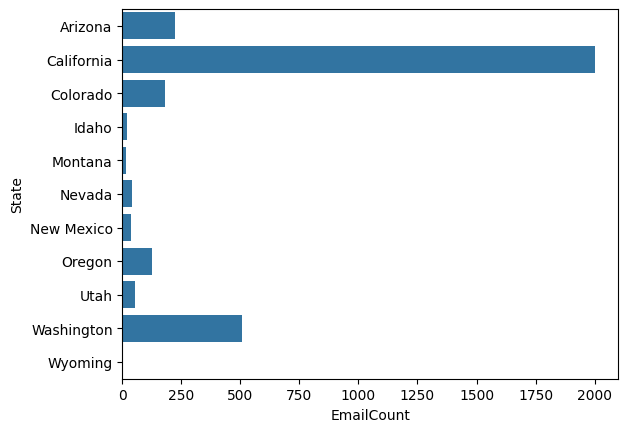

In [8]:
query = """
SELECT State, COUNT(EmailID) AS EmailCount
FROM split_geo_df
GROUP BY State
"""
state_email_count = psql.sqldf(query, locals())
sns.barplot(state_email_count, x =  "EmailCount", y ="State")
plt.show()

Here we can see that majority of the customers are from California. Then Washington, Colorado and Arizona have a good chunk of customers. 

Additionally we seem that all of these states are west coast states.

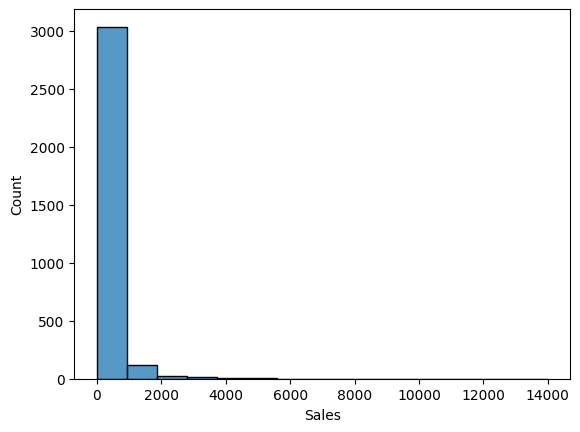

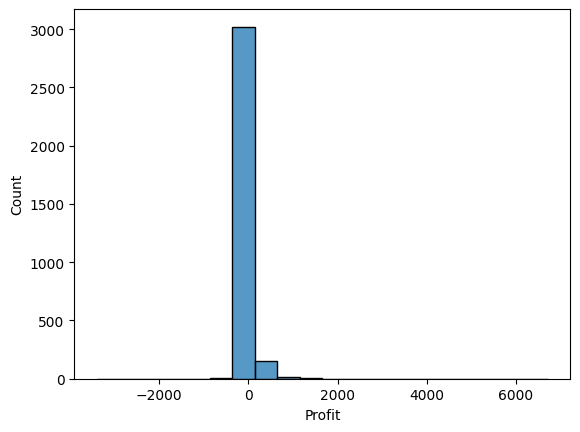

,Sales,Profit
count,3203.000000,3203.000000
mean,226.493233,33.849032
std,524.876877,174.109081
min,0.990000,-3399.980000
25%,19.440000,3.852000
50%,60.840000,11.166400
75%,215.809000,33.000400
max,13999.960000,6719.980800


In [9]:
sns.histplot(split_geo_df, x = "Sales", bins = 15)
plt.show()
sns.histplot(split_geo_df, x = "Profit", bins = 20)
plt.show()

query = """
SELECT Sales, Profit
FROM split_geo_df
"""
psql.sqldf(query, locals()).describe()

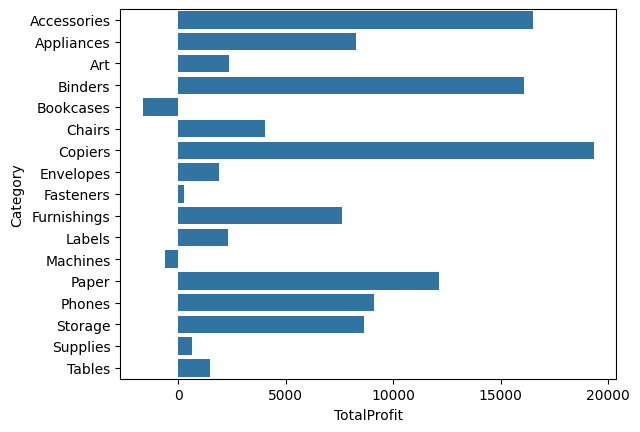

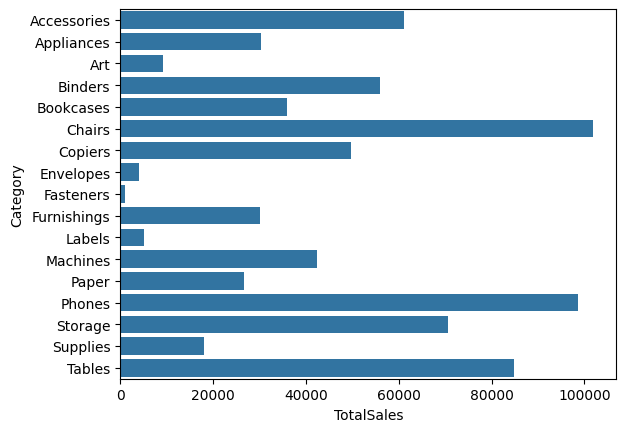

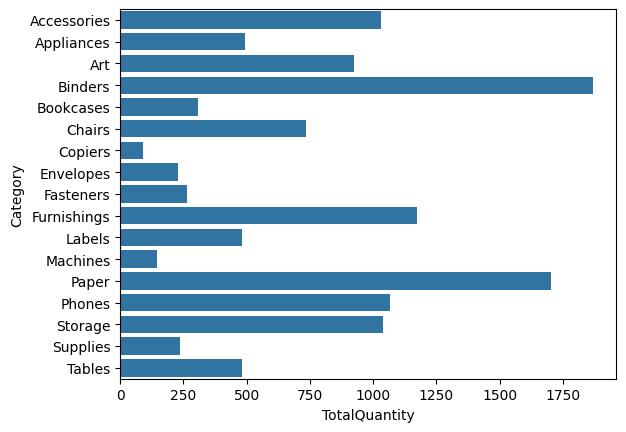

In [10]:
query = """
SELECT Category, 
SUM(Profit) AS TotalProfit,
SUM(Sales) AS TotalSales,
SUM(Quantity) AS TotalQuantity 
FROM split_geo_df
GROUP BY Category
"""
category_info = psql.sqldf(query, locals())
sns.barplot(category_info, y= "Category", x = "TotalProfit")
plt.show()
sns.barplot(category_info, y= "Category", x = "TotalSales")
plt.show()
sns.barplot(category_info, y= "Category", x = "TotalQuantity")
plt.show()

In terms of profit binders, copiers, accessories, and paper made good profit. Seems like school related items are the items mostly bought which is a common trend in the barcharts. How in sales chairs and tables are the itemest with the biggest sales. Then in Quantity binder and paper are the items with the highest quantity. Hence it seems like customers are mostly likley school staff and/or students. 

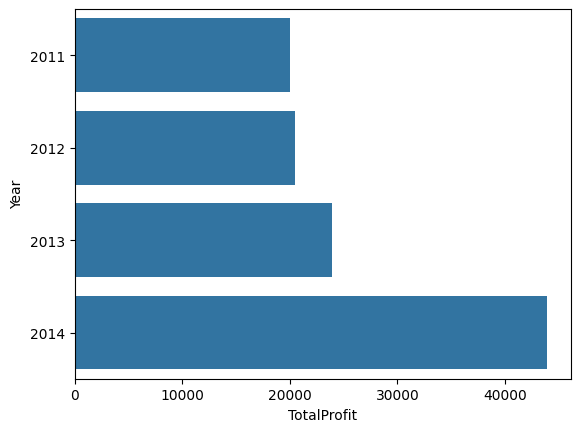

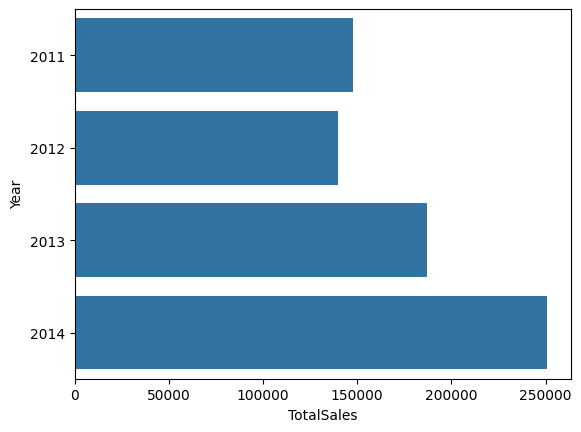

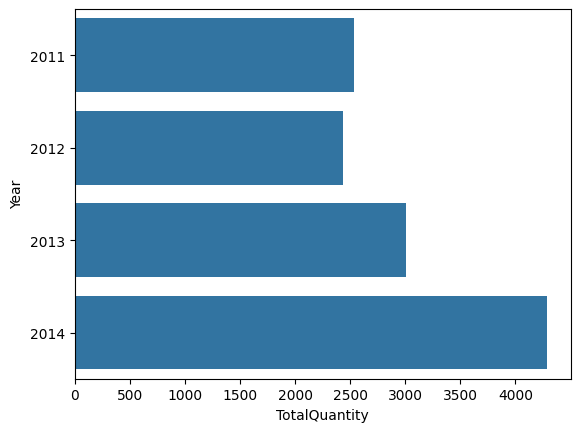

In [11]:
query = """
SELECT Year, 
SUM(Profit) AS TotalProfit,
SUM(Sales) AS TotalSales,
SUM(Quantity) AS TotalQuantity 
FROM split_geo_df
GROUP BY Year
"""
yearly_info = psql.sqldf(query, locals())
sns.barplot(yearly_info, y= "Year", x = "TotalProfit")
plt.show()
sns.barplot(yearly_info, y= "Year", x = "TotalSales")
plt.show()
sns.barplot(yearly_info, y= "Year", x = "TotalQuantity")
plt.show()

Overall the year 2014 had the highest TotalQuanity, TotalSales and TotalProfit and by a good margin at that. The trend across all graphs is that it was steady for 2011 and 2012, increased a bit in 2013 then increased by a good amount in 2014.

# Dashboard + Analysis

We will convert the cleaned/updated dataframe to an excel sheet to use as a data  source on Tableau.

In [20]:
split_geo_df.to_excel('CleanedAmazon.xlsx')

Here is the link to the Tableau Dashboard for this dataset: https://public.tableau.com/shared/R3ST7F6PD?:display_count=n&:origin=viz_share_link

Note: the sheets with the name "Full ..." are the dashboards.

## Anaylsis

**Full Category**

The most common trend in the 2011 is that majority of the categories saw a spike around July-September and December. This trend was to be expected since we did see that it was most of the  cateogries seemed appropriate for school. Thus it would make the most sense that we would see the months leading up to the start of school have higher sales/profits. The only category havin a different trend are phones which saw a spike in November.

In 2012 the common shifted to also include the months of March and May and for the phone saw more sales in March, April and August. In the following years the common trend stayed the same but for the phone, it saw a spike in June/September. Which aligns with the phone trend in the present, where new phones usually release around September.

From this we can conclude that school items are a big hit and should be prioritized. For example during July-September we should have bigger back to school sales.

**Full Products**

One common trend we found that number of products for a particular category usually saw a big increase towards the end of the year. Which seems a bit odd given the biggest buys happen in July-September. This suggest that people only want a certain product during the big buys but perhaps near the holiday months discounts may arise and tempt people into buying more different types of product.

Thus I propose we should offer more discounts on less popular products.

**Full Geography**

Califorina and Washington are the states that reels in the most sales across all categories. In California San Fransico and L.A reel in the most sales while in Washington Seattle reels in the most sales. 

The states that reels in negative profit is Oregon. The categories that does not do well in Oregon are bookcases, binders, and tables. Although there are other states that have a negative profit, Oregon has a higher likelihood of having a negative profit. 